# Intro CNN - CIFAR10

Een __Convolutional Network (of ConvNets)__ is een type neurale netwerken dat erg geschikt is om met afbeeldingen om te gaan. 
</br>Belangrijke features in een afbeelding worden geleerd door het toepassen van de convolutie operatie, wat resulteert in een feature map. Deze feature map worden vervolgens gevoed aan een fully connected netwerk, wat uiteindelijk resulteert in een voorspelling.

## Importeren van packages

We gebruiken opnieuw __TensorFlow__ om ons model op te stellen. Matplotlib zullen we hier gebruiken we om de dataset te visualiseren.

In [1]:
import tensorflow as tf
import seaborn as sns

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

Zorg ervoor dat je minstens TensorFlow versie 2.0.0 geïnstalleerd hebt.

In [2]:
print(tf.__version__)

2.7.0


## Downloaden van de CIFAR10 dataset

De CIFAR10-dataset is één van de meest gebruikte binnen computer vision en bevat __60.000 afbeeldingen__ met een __resolutie van 32x32 pixels__ in __3 kanalen__. Elke afbeelding is onderverdeeld in een van de __10 klassen__ (6.000 beelden per klasse). De __trainingset bevat 50.000 examples__, __de testset bevat 10.000 examples.__

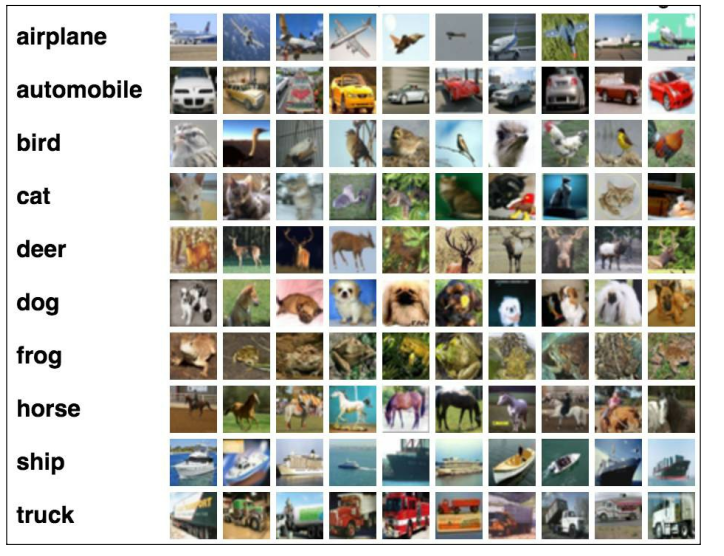

Door de bekendheid van deze dataset kan deze rechstreeks gedownload en geladen worden via de <code>load_data()</code> functie in TensorFlow.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

We kunnen vervolgens __de dimensies en het aantal afbeeldingen__ afdrukken:

In [4]:
print("Dimensies trainingset:{}".format(train_images.shape))
print("Dimensies testset:{}".format(test_images.shape))

Dimensies trainingset:(50000, 32, 32, 3)
Dimensies testset:(10000, 32, 32, 3)


Hieruit kunnen we opmerken dat elke afbeelding inderdaad uit __3 kleurkanalen bestaat (RGB)__.

In [5]:
'''TODO Normaliseer de pixel waarden zodat deze waarden aannemen tussen 0 en 1. Dit zal ervoor zorgen dat we efficiënter kunnen leren.'''
train_images = train_images / 255.0
test_images = test_images / 255.0

Volgende __10 labels__ worden in de dataset gebruikt:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

## Data visualisatie

We plotten enkele afbeeldingen uit de dataset zodat we een idee te krijgen hoe deze eruit ziet. 
</br>Zoals je zal zien zijn deze door hun lage resolutie erg wazig, maar toch kunnen we zonder veel moeite de objecten herkennen. 

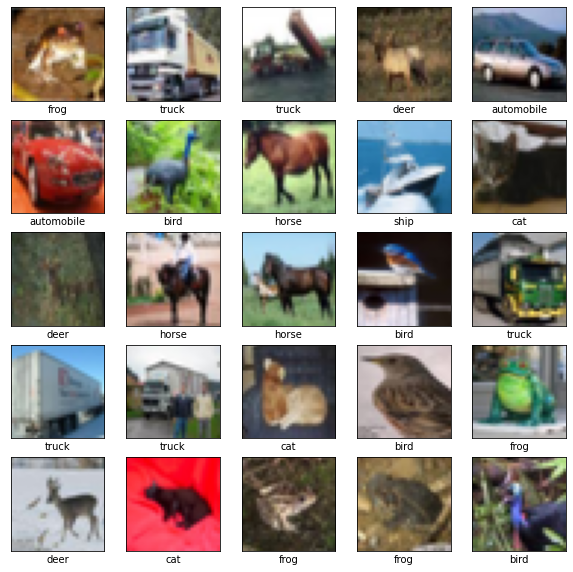

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

We visualiseren hoeveel samples elke klasse telt:

C:\Users\robbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

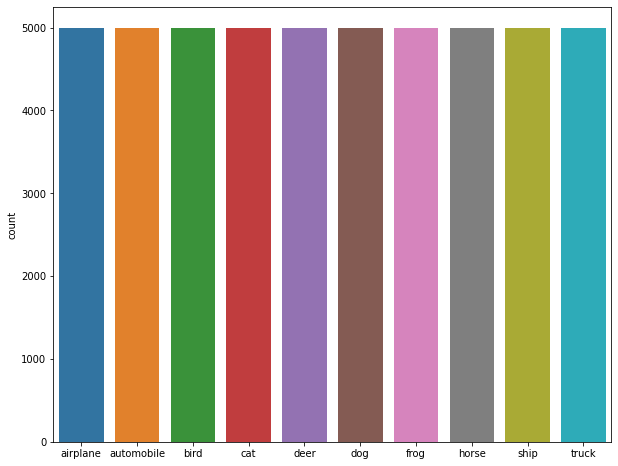

In [7]:
plt.figure(figsize=(10,8))
p = sns.countplot(train_labels.flatten())
p.set(xticklabels=class_names)

## Creëren van het model

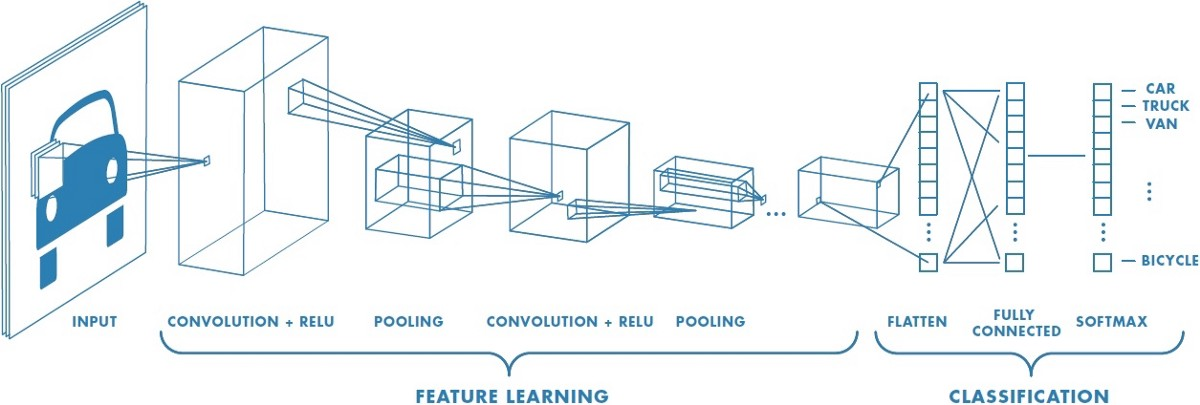

Bovestaande afbeelding geeft de architectuur van een CNN architectuur weer, die typisch uit __2 belangrijke onderdelen__ bestaat:
- __Feature learning:__ Hier leer je de belangrijkste features (*convolutionele lagen*) en verklein je het resultaat (dmv de *pooling lagen*).
- __Classificatie:__ De feature maps worden gevoed aan een dense (fully-connected) netwerk om een uiteindelijke classificatie te maken.

Aan de hand van de TensorFlow <code>Sequential</code> klasse kunnen we de verschillende lagen op elkaar stapelen en zo ons model opbouwen:

In [8]:
model = models.Sequential()

### CNN - Feature learning 

In de eenvoudigste, meest traditionele vorm bestaat het __feature learning__ gedeelte van het netwerk uit __een of meerdere sets van een convolutionele en pooling laag.__ 

__Opmerking:__ Door het toepassen van regularisatietechnieken kunnen we overfitting proberen voorkomen. Veel van deze technieken (waaronder <code>BatchNormalization()</code> en <code>Dropout()</code>) kunnen we toepassen op een of meerdere lagen van ons model door deze via <code>model.add()</code> toe te voegen.

In [9]:
'''
    TODO: 
    - Definieer een nieuwe conv. laag met 64 filters van 3x3. Gebruik relu als activatiefunctie.
    - Voorzie een maxpooling laag met kernel = 2x2 en stride = 2.
    
    Pointers: 
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
    - https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
    
'''
  
# Eerste conv2D + pooling laag
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Tweede conv2D + pooling laag
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

De architectuur van ons netwerk kunnen we vervolgens visueel weergeven via <code>model.summary()</code>:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


Je kan hier ook het __aantal parameters (of de te trainen gewichten)__ aflezen. 
</br>Zoals je ziet is dit al snel een aanzienlijk aantal, zelfs voor een klein aantal lagen.

__Pooling__: 
</br>Door het toepassen van downsampling op de output van de convolutionele laag (= de feature maps) wordt de output steeds kleiner. Dit heeft volgende __belangrijke voordelen__ (zie ook theorie):
- Verlaagt de dimensie van de feature maps => minder parameters om te leren => sneller
- Behoudt de ruimtelijke informatie (kan gezien worden als vorm van generalisatie doordat niet de specifieke locatie van features in de afbeelding wordt weergeven)

Naarmate de dimensies van de output kleiner worden in verdere lagen (net door deze pooling toe te passen), kunnen we meer filters toevoegen in de convolutionele lagen (en dus meer features leren).

### CNN - Classifier

Vervolgens voegen we een het classificatie-gedeelte toe aan ons netwerk waardoor we effectief voorspellingen kunnen maken. Het resultaat van de laatste conv. laag is een feature map in matrixvorm. Als we dit willen voeden aan ons classificatienetwerk, moeten we deze eerst omzetten naar een vector (zie <code>Flatten())</code>.
De laatste laag is een <code>Dense</code>laag met <code>Softmax</code> activatiefunctie. Hierdoor krijgt voor elk example elke class een probabiliteit toegekend tussen 0 en 1, waarbij hun som gelijk is aan 1.

In [11]:
''' 
    TODO: 
    
    Breid het netwerk uit met de classifier die de vorm aanneemt van een dense netwerk. Hierbij is het volgende belangrijk:
    - De output van het feature learning gedeelte van het netwerk (= feature map in matrix vorm) moet eerst vlak gemaakt worden. Tip: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
    - Je voorziet een fully-connected hidden laag met 64 neuronen en RELU als activatiefunctie.
    - Je voorziet een laatste laag met het correct aantal neuronen en de softmax activatiefunctie. 
'''

# Flatten laag
# Dense laag met 64 neuronen en RELU als activatiefunctie
# Dense laag met het correct aantal neuronen en de softmax activatiefunctie
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

De complete architectuur kunnen we vervolgens weer afdrukken:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Compilen en trainen van het model

### Compileren

Nu ons model volledig is opgebouwd, kunnen we het compileren. Daarbij moeten we ook het volgende meegeven:
- __De gekozen optimizer:__ Er is hier geen "beste" keuze, die zal voornamelijk afhangen van je model en toepassing. Er zijn natuurlijk wel enkele "nieuwe" optimizers die beter presteren dan de klassieke. (Zie ook: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- __De loss functie:__ Hier moet je nadenken over hoe je probleem eruit ziet: hier gaat het om classificatie en het resultaat van onze voorspelling vormt een probabiliteit, waardoor de *categorical cross entropy loss* een goede keuze zou zijn. Bekijk zeker ook volgende link om de juiste keuze te maken: https://cwiki.apache.org/confluence/display/MXNET/Multi-hot+Sparse+Categorical+Cross-entropy
- __Metric:__ Op basis van welke metriek ga je de kwaliteit van je model evalueren? (Zie ook: https://www.tensorflow.org/api_docs/python/tf/keras/metrics). Meestal zullen we *accuracy* gebruiken, maar er zijn er nog andere die in bepaalde situaties aanbevolen zijn.

In [13]:
'''TODO: Kies de adam optimizer en voorzie de juiste loss functie'''
optimizer = 'RMSprop' # vul in
loss = tf.keras.losses.SparseCategoricalCrossentropy() # vul aan
metric = ['accuracy'] # vul in

Vervolgens compileren we ons model:

In [14]:
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

### Trainen

Wanneer we ons model trainen via <code>model.fit()</code>, kunnen we een <code>history</code> object bijhouden. Dit object houdt de __loss (training en test)__ en __accuracy (training en test)__ bij over de verschillende epochs. Aangezien het niet zo efficiënt is om telkens de volledige dataset aan ons neuraal netwerk aan te leveren (probleem van trage convergentie en lokale minima/saddle points)*(zie ook theorie)*, zullen we ons model trainen __op een deel van de dataset per iteratie__. Het aantal examples dat we per iteratie trainen noemen we __de batch size__. 

We kiezen er hier voor om ons model te trainen over __5 epochs__ en een __batch size van 64__. Als je zelf een model opbouwt zijn dit ontwerpbeslissingen waarover je moet nadenken.

In [15]:
NUM_EPOCHS = 5
BATCH_SIZE = 64

In [16]:
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, validation_data=(test_images, test_labels), batch_size=BATCH_SIZE)

Epoch 1/5
782/782 [==============================] - 35s 43ms/step - loss: 1.6006 - accuracy: 0.4278 - val_loss: 1.3958 - val_accuracy: 0.5111
Epoch 2/5
782/782 [==============================] - 36s 47ms/step - loss: 1.2126 - accuracy: 0.5762 - val_loss: 1.2155 - val_accuracy: 0.5674
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 1.0571 - accuracy: 0.6307 - val_loss: 1.2400 - val_accuracy: 0.5721
Epoch 4/5
782/782 [==============================] - 36s 46ms/step - loss: 0.9495 - accuracy: 0.6694 - val_loss: 1.0433 - val_accuracy: 0.6349
Epoch 5/5
782/782 [==============================] - 37s 48ms/step - loss: 0.8739 - accuracy: 0.6978 - val_loss: 1.0390 - val_accuracy: 0.6454


## Evalueren van het model

De __accuracy__ is een metric die geeft aan __hoeveel % van onze voorspellingen correct waren__. Meer info over de metrics die je kan selecteren: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/
</br>We kunnen de accuracy samen met de loss plotten, zowel van onze trainingset als testset.

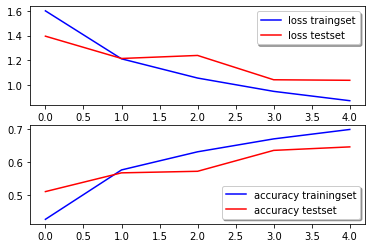

In [17]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss traingset')
ax[0].plot(history.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

## Regularisatie

Om overfitting te voorkomen kunnen we gebruik maken van enkele regularisatietechnieken (zie ook theorie):
- Dropout (Zie https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
- Batch normalization (Zie https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
- L1 & L2 normalization (Zie https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2)
- Data augmentatie (Zie https://www.tensorflow.org/tutorials/images/data_augmentation)
- Early Stopping (Zie https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

### Dropout

Dropout zal overfitting vermijden door tijdens het trainen een deel van de activaties te deactiveren. Je kan dit eenvoudig toepassen door onderstaande code toe te voegen na de laag waaop je dropout wil toepassen:
<code>tf.keras.layers.Dropout(0.2)</code>*(in dit geval zullen we 20% van de neuronen deactiveren)*

### Data augmentatie

Bij wijze van voorbeeld gaan we data augmentatie toepassen. Dit kan eenvoudig door een <code>ImageDataGenerator</code> toe te passen waar we de transformaties definiëren:

In [18]:
# Data augumetation
datagen = ImageDataGenerator(
    rotation_range=0.3,  
    zoom_range = 0.1, 
    horizontal_flip=True
)

De <code>ImageDataGenerator</code> zal in real-time aan data augmentatie doen. Dit wil zeggen dat de dataset zelf niet aangroeit, maar dat er *on-the-fly* data transformaties gebeuren tijdens elke epoch en dat deze transformaties gebruikt worden voor training. Het aantal afbeeldingen in elke epoch blijft daarom gelijk aan het origineel aantal afbeeldingen (wanneer we geen transformaties toepassen).

### Early Stopping

Early Stopping is een techniek die overfitting probeert te voorkomen door het trainen te stoppen van zodra de loss voor de testset begint te stijgen. Dit geeft namelijk aan dat ons model het goed doet voor de trainingsdata, maar niet meer voor data die het nog niet heeft gezien. 

We kunnen Early Stopping eenvoudig in ons model inbouwen door het voorzien van een callback, die we meegeven aan de <code>model.fit()</code> functie:

<code>tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1)</code>

De parameter <code>patience</code> geeft hierbij aan na hoeveel epochs zonder verbetering er gestopt mag worden met trainen. 

In [19]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, verbose=1)

We kunnen nu opnieuw het model trainen, maar ditmaal passen we de <code>ImageDataGenerator</code> en <code>EarlyStopping</code> toe.

In [20]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=BATCH_SIZE), validation_data=(test_images, test_labels), epochs=NUM_EPOCHS, callbacks=[es])

Epoch 1/5
782/782 [==============================] - 60s 76ms/step - loss: 0.9140 - accuracy: 0.6859 - val_loss: 0.9602 - val_accuracy: 0.6695
Epoch 2/5
782/782 [==============================] - 62s 79ms/step - loss: 0.8648 - accuracy: 0.7010 - val_loss: 0.9024 - val_accuracy: 0.6956
Epoch 3/5
782/782 [==============================] - 61s 77ms/step - loss: 0.8286 - accuracy: 0.7147 - val_loss: 0.8409 - val_accuracy: 0.7152
Epoch 4/5
782/782 [==============================] - 60s 77ms/step - loss: 0.7991 - accuracy: 0.7241 - val_loss: 0.8408 - val_accuracy: 0.7152
Epoch 5/5
782/782 [==============================] - 59s 76ms/step - loss: 0.7730 - accuracy: 0.7333 - val_loss: 0.8640 - val_accuracy: 0.7060
Epoch 00005: early stopping


## Evalueren van het model na toepassen van regularisatie

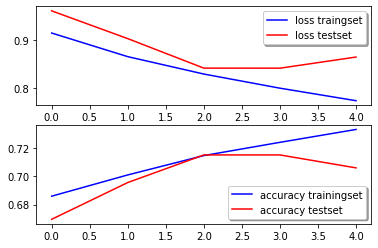

In [21]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='loss traingset')
ax[0].plot(history.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

Vergelijk nu beide resultaten (zonder en mét regularisatie). Hebben we betere resultaten bekomen?